In [1]:
function plotData(X, y, xText, yText)
    figure; % open a new figure
    plot(X, y, 'ob'); %Plot the data in blue circles
    ylabel(yText); % Set the y−axis label 
    xlabel(xText); % Set the x−axis label

    figure; % open a new figure
    plot(X, y, '*g'); %Plot the data in green asterisks
    ylabel(yText); % Set the y−axis label 
    xlabel(xText); % Set the x−axis label

    figure; % open a new figure
    plot(X, y, 'dr'); %Plot the data in red diamonds
    ylabel(yText); % Set the y−axis label 
    xlabel(xText); % Set the x−axis label
endfunction

In [2]:
function cost = computeCost(X, y, theta, lambdaParameter)
    dataLength = length(y);
    cost = 0;
    
    for i = 1:dataLength
        hypothesis = theta(1) + theta(2) * X(i);
        cost = cost + (hypothesis - y(i))^2;
    endfor
    cost = cost / (2 * dataLength + 2 * (lambdaParameter * (theta(1)^2 + theta(2)^2)));
%     cost = cost );
endfunction

In [3]:
function plotRMSE(rmse, iterations, lambdaParameter)
    figure; % open a new figure
    plot(rmse(1:iterations));
    title(strcat("Lambda: ", num2str(lambdaParameter)));
    ylabel("RMSE"); % Set the y−axis label 
    xlabel("Iteration"); % Set the x−axis label
    
%     print (fg, ".pdf", "-dpdflatexstandalone");
endfunction

In [4]:
function plotLinearModel(X_data, y, theta, xText, yText, lambdaParameter)
    figure;
    plot(X_data, y, 'dr');
    title(strcat("Lambda", num2str(lambdaParameter)));
    ylabel(xText);
    xlabel(yText);
    
    X = [ones(length(y), 1), X_data];
    
    hold on;
    plot(X_data, X*theta, "-");
    legend('Training data', "Linear regression");
    hold off;
endfunction

In [5]:
function [theta, rmse] = gradientDescent(X_data, y_data, lambdaParameter)
    dataLength = length(y_data);
    X = [ones(dataLength, 1), X_data];
    
    theta = zeros(2, 1);
    
    iterations = 1500;
    alpha = 0.01;
    
    initialCost = computeCost(X_data, y_data, theta, lambdaParameter);
    
    rmse = zeros(iterations);
    
    printf("Initial cost: %f\n", initialCost);
    
    for iter = 1:iterations
        if(mod(iter, 100) == 0)
            printf("Costo %f Iter: %i\n", computeCost(X_data, y_data, theta, lambdaParameter), iter);
        endif
        
        temp1 = 0;
        temp2 = 0;
        
        batchMSE = 0;
        for i = 1:dataLength
            hypothesis = theta(1) + theta(2) * X(i, 2);
            temp1 = temp1 + (hypothesis - y_data(i));
            temp2 = temp2 + ((hypothesis - y_data(i)) * X(i, 2));
            batchMSE = batchMSE + ((hypothesis - y_data(i))^2);
        endfor
        
        batchMSE = batchMSE / dataLength;
        rmse(iter) = batchMSE^(1/2);
        
        temp1 = temp1 * alpha / dataLength;
        temp2 = temp2 * alpha / dataLength;
        
        theta(1) = (theta(1) * (1 - alpha * (lambdaParameter / dataLength))) - temp1;
        theta(2) = (theta(2)) * (1 - alpha * (lambdaParameter / dataLength)) - temp2;
    endfor
    
    printf("Optimal theta: %f, %f\n", theta(1), theta(2));
endfunction

In [6]:
function visualizeParameters(X, y, theta, lambdaParameter)
    % Grid over which we will calculate J
    theta0_vals = linspace(-10, 10, 100);
    theta1_vals = linspace(-1, 4, 100);

    % initialize J_vals to a matrix of 0's
    J_vals = zeros(length(theta0_vals), length(theta1_vals));

    % Fill out J_vals
    for i = 1:length(theta0_vals)
        for j = 1:length(theta1_vals)
          t = [theta0_vals(i); theta1_vals(j)];    
          J_vals(i,j) = computeCost(X, y, t, lambdaParameter);
        end
    end
    
    % Because of the way meshgrids work in the surf command, we need to 
    % transpose J_vals before calling surf, or else the axes will be flipped
    J_vals = J_vals';
    % Surface plot
    figure;
    surf(theta0_vals, theta1_vals, J_vals)
    xlabel('\theta_0'); ylabel('\theta_1');

    % Contour plot
    figure;
    % Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
    contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
    xlabel('\theta_0'); ylabel('\theta_1');
    hold on;
    plot(theta(1), theta(2), 'rx', 'MarkerSize', 10, 'LineWidth', 2);
    title(strcat("Lambda", num2str(lambdaParameter)));
endfunction

In [7]:
function compute(X, y, xText, yText, lambdaParameters)
    fprintf('Plotting Data ...\n');
    plotData(X, y, xText, yText);
    
    for i = 1:length(lambdaParameters)
        
        printf("Calculating gradientDescent with lambda %i\n", lambdaParameters(i));
        [theta, rmse] = gradientDescent(X, y, lambdaParameters(i));
        
        printf("Plotting RMSE \n");
        plotRMSE(rmse, length(y), lambdaParameters(i));
        
        printf("Plotting Linear model\n");
        plotLinearModel(X, y, theta, "X", "Y", lambdaParameters(i));
        
        printf("Plotting parameters\n");
        visualizeParameters(X, y, theta, lambdaParameters(i));
    endfor
endfunction

In [8]:
% ex1_data = load('ex1/ex1data1.txt');
% ex1_X = ex1_data(:, 1);
% ex1_y = ex1_data(:, 2);

% compute(ex1_X, ex1_y, "Population of city in 10,000s", "Profit in $10,000s", [0,10, 30, 50, 100]);

Plotting Data ...
Calculating gradientDescent with lambda 0
Initial cost: 0.000000
Costo 0.000000 Iter: 100
Costo 0.000000 Iter: 200
Costo 0.000000 Iter: 300
Costo 0.000000 Iter: 400
Costo 0.000000 Iter: 500
Costo 0.000000 Iter: 600
Costo 0.000000 Iter: 700
Costo 0.000000 Iter: 800
Costo 0.000000 Iter: 900
Costo 0.000000 Iter: 1000
Costo 0.000000 Iter: 1100
Costo 0.000000 Iter: 1200
Costo 0.000000 Iter: 1300
Costo 0.000000 Iter: 1400
Costo 0.000000 Iter: 1500
Optimal theta: 0.000334, -0.000022
Plotting RMSE 
Plotting Linear model
Plotting parameters
Calculating gradientDescent with lambda 10
Initial cost: 0.000000
Costo 0.000000 Iter: 100
Costo 0.000000 Iter: 200
Costo 0.000000 Iter: 300
Costo 0.000000 Iter: 400
Costo 0.000000 Iter: 500
Costo 0.000000 Iter: 600
Costo 0.000000 Iter: 700
Costo 0.000000 Iter: 800
Costo 0.000000 Iter: 900
Costo 0.000000 Iter: 1000
Costo 0.000000 Iter: 1100
Costo 0.000000 Iter: 1200
Costo 0.000000 Iter: 1300
Costo 0.000000 Iter: 1400
Costo 0.000000 Iter: 15

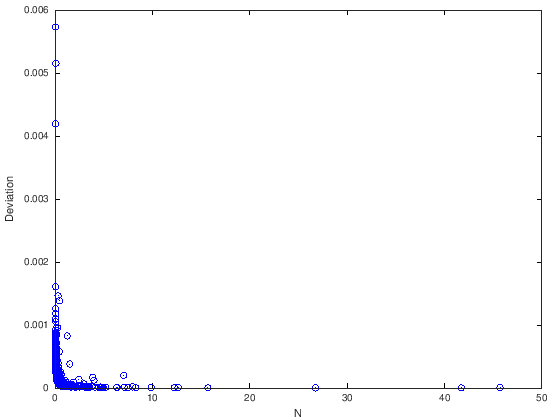

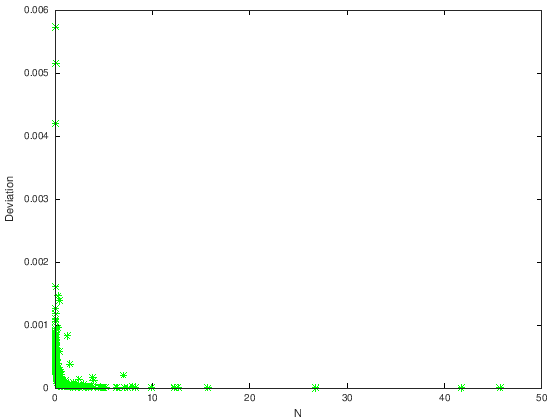

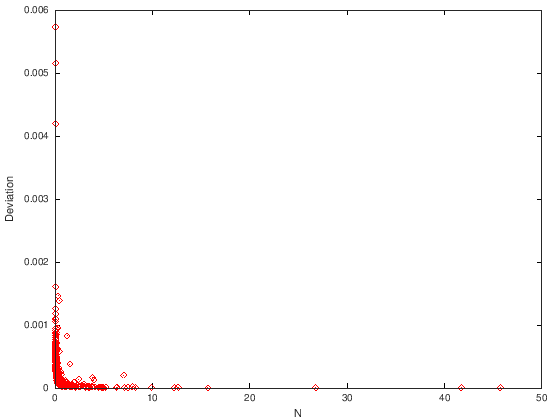

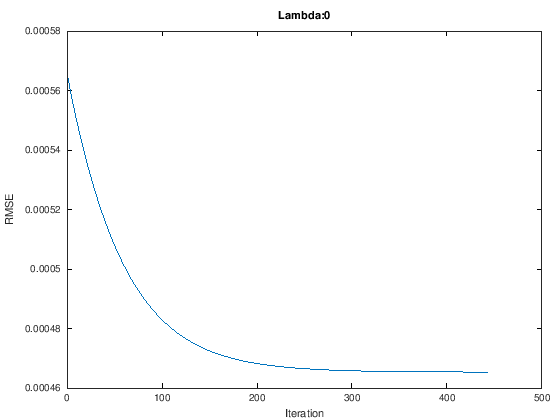

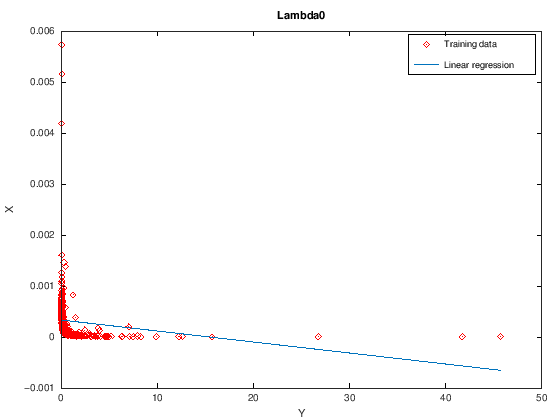

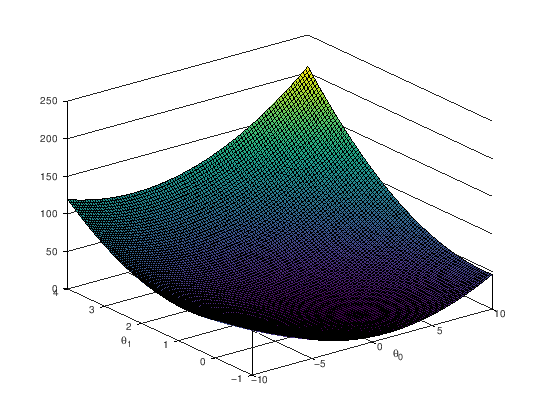

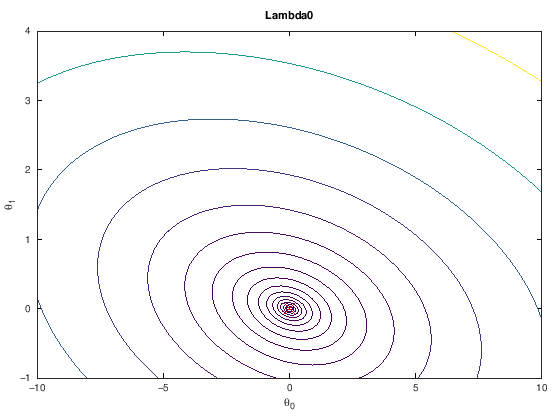

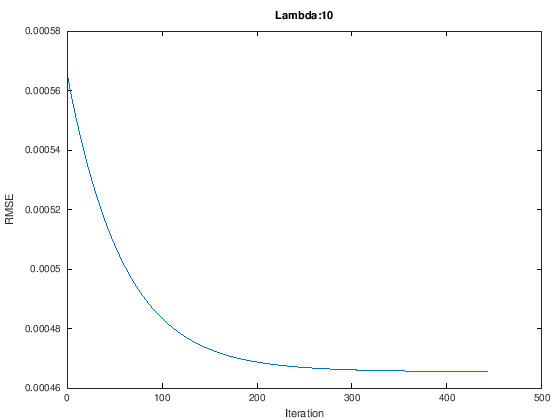

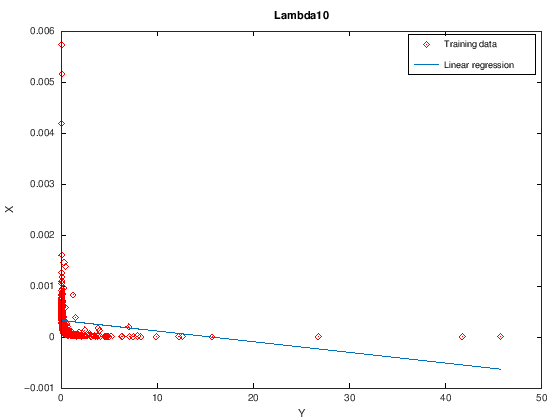

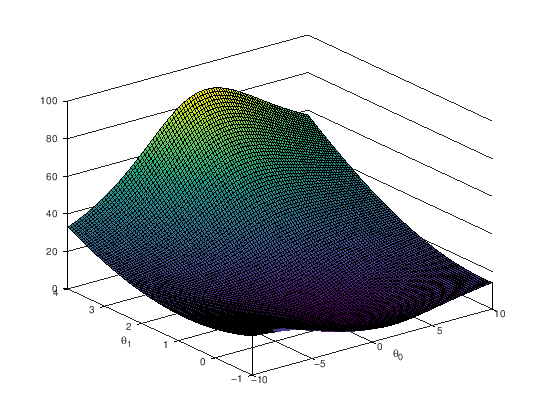

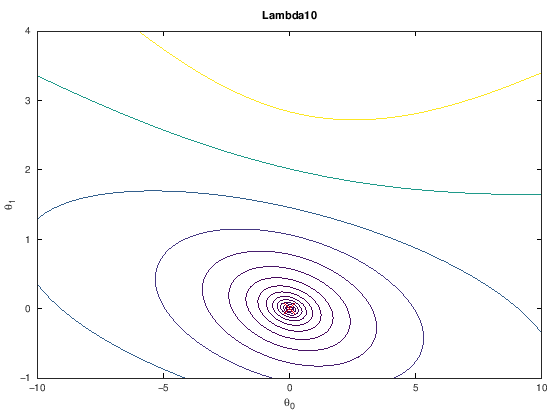

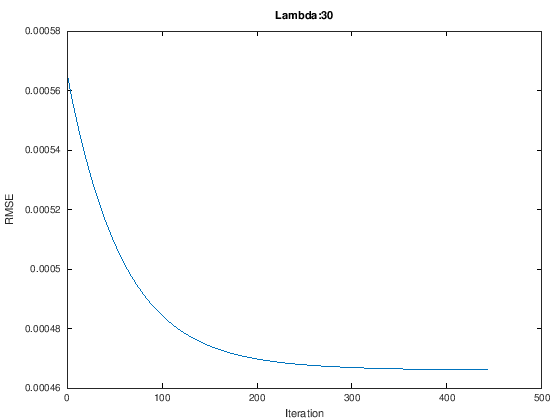

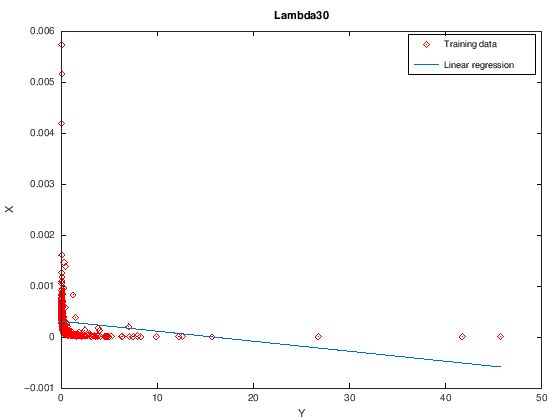

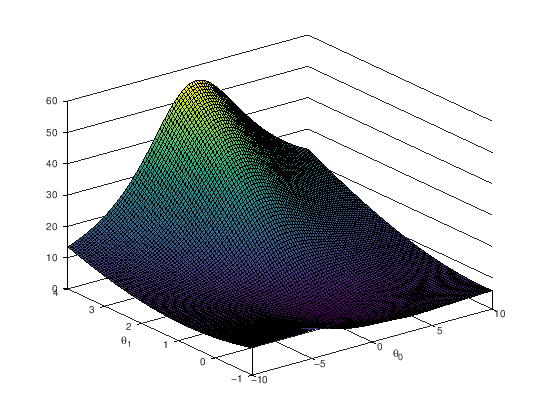

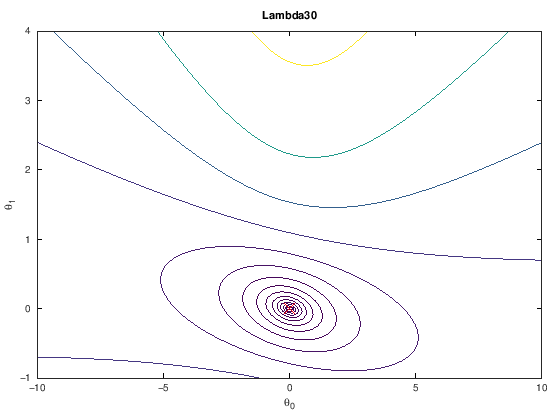

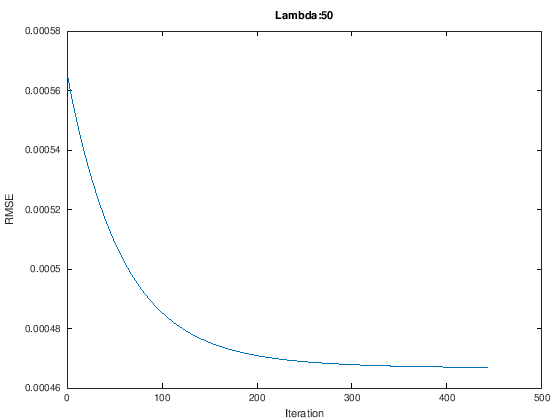

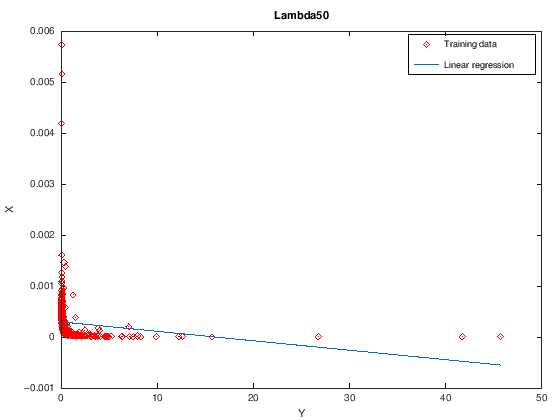

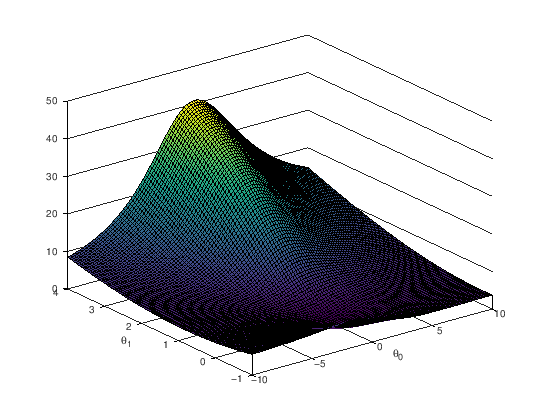

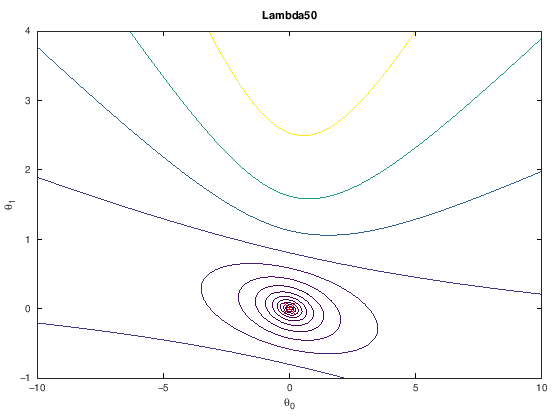

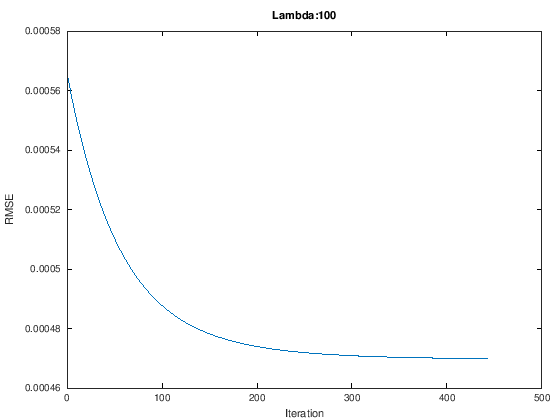

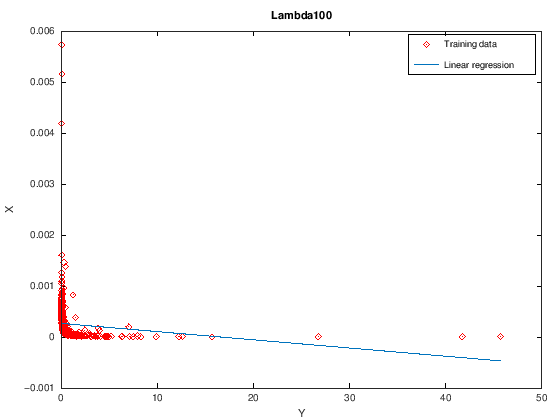

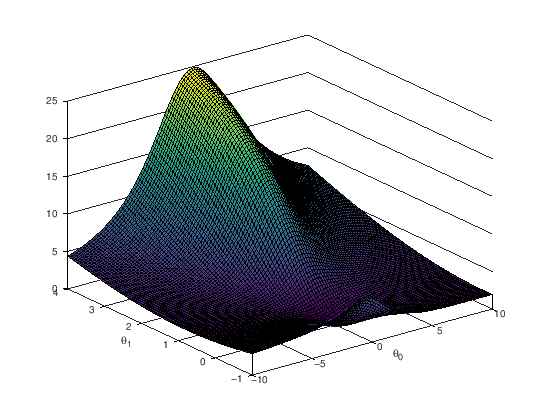

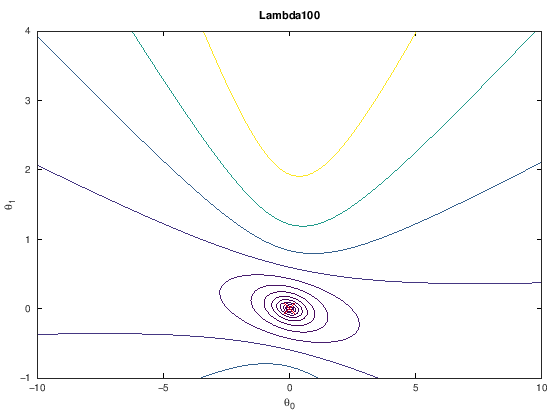

In [11]:
devi = csvread('devi.csv');
devi_X = devi(2:end, 3);
devi_y = devi(2:end, 4);

compute(devi_X / 1000, devi_y, "N", "Deviation", [0, 10, 30, 50, 100]);

In [10]:
% devi = csvread('devi.csv');
% devi_X = devi(2:end, 3);
% devi_y = devi(2:end, 4);

% compute(log(devi_X), log(devi_y), "Log N", "Log Deviation", [0, 10, 30, 50, 100]);